# NLP Emails classification project

In [166]:
# Importing the necessary libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# Importing the dataset

In [169]:
data = pd.read_csv(r"G:\All Project Dataset\emails2.csv", sep=",")
data.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [170]:
data.drop( ["Unnamed: 0"], axis = 1 ,inplace = True)

In [171]:
data.head()

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [172]:
data.shape

(48076, 4)

In [173]:
data.columns

Index(['filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [174]:
data.describe()

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,bass-e/discussion_threads/162.,<22621921.1075848326319.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [176]:
data.content.head(10)

0    eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...
1                                             fuck you
2    Gentlemen:\nThe following champagne is availab...
3    sorry i've taken so long...just been trying to...
4    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
5    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...
6    Do you know my hr rep's name?\n\n\n\nJennifer ...
7    sorry i've taken so long...just been trying to...
8    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
9    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...
Name: content, dtype: object

## Exploratory data analysis

In [177]:
# Checking for NA values

In [178]:
data.isna().sum()

filename      0
Message-ID    0
content       0
Class         0
dtype: int64

#### There are no NA values in the dataset

In [179]:
# Checking the unique values in the dataset

In [180]:
data.nunique()

filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

#### Since the content is showing 24565 unique values out of 48076, there are some duplicate values in the "content" column

In [181]:
# Checking the number of duplicate values 

In [182]:
import collections

In [183]:
duplicate_items = [item for item , count in collections.Counter(data.content).items() if count>1]

In [184]:
len(duplicate_items)

11329

#### There are total 11329 dupicate values in the "content" column

In [185]:
# Checking the counts for each label in "Class" column

In [186]:
data["Class"].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

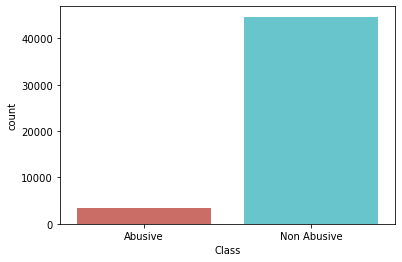

In [187]:
sns.countplot(data["Class"], palette="hls")

In [188]:
print(sum(data["Class"]=="Abusive")/sum(data["Class"]=="Non Abusive")*100, "percent of abusive emails")
print(100 - sum(data["Class"]=="Abusive")/sum(data["Class"]=="Non Abusive")*100, "percent of non-abusive emails")

7.634442305109032 percent of abusive emails
92.36555769489097 percent of non-abusive emails


#### The count for "Abusive" class is very less compared to "Non Abusive" class, hence the data is imbalanced.

In [189]:
data.columns

Index(['filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [190]:
# Dropping the unimportant columns like 'Unnamed: 0', 'filename', 'Message-ID'

In [191]:
df = data.drop(columns=[ 'filename', 'Message-ID'], axis=1)

In [192]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [193]:
# Seperating the "Abusive" and "Non Abusive" classes

In [194]:
abusive = df[df["Class"]=="Abusive"]
abusive.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [195]:
abusive.shape

(3410, 2)

In [196]:
non_abusive = df[df["Class"]=="Non Abusive"]
non_abusive.head()

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive


In [197]:
non_abusive.shape

(44666, 2)

In [198]:
# Balancing the data by removing the duplicate values from only "Non Abusive" class

In [199]:
non_abusive1 = non_abusive.drop_duplicates()

In [200]:
non_abusive1.shape

(23014, 2)

In [201]:
print("Abusive ", len(abusive),"\n""Non Abusive ", len(non_abusive1))

Abusive  3410 
Non Abusive  23014


In [202]:
print(len(abusive)/len(non_abusive1)*100, " percentage of abusive mails")
print(100- (len(abusive)/len(non_abusive1))*100, " percentage of non-abusive mails")

14.817067871730252  percentage of abusive mails
85.18293212826975  percentage of non-abusive mails


#### The data is more balanced  compared to original data 

In [203]:
# Concatinating both 'abusive' and 'non-abusive' data into single dataset

In [204]:
new_df = pd.concat([abusive,non_abusive1], axis=0, ignore_index=True)

In [205]:
new_df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [206]:
new_df.shape

(26424, 2)

In [207]:
# Preprocessing the text

In [208]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#from nltk import word_tokenize

In [209]:
# Stop words

In [210]:
corpus = []
ps = PorterStemmer()

for i in range(0, new_df.shape[0]):
    # Removing special characters from "title"
    content = re.sub(pattern = '[^a-zA-Z]', repl=' ', string = new_df.content[i])
    
    # Converting the title to lowercase
    content = content.lower()
    
    # Tokenizing the news titles into words 
    words = content.split()
    
    # removing the stop words
    words = [word for word in words if word not in set(stopwords.words('english'))]
    
    # Stemming the words
    words = [ps.stem(word) for word in words]
    
    # Joining the stem words
    title = ' '.join(words)
    
    # Building a corpus of news title 
    corpus.append(title)

In [211]:
corpus[0:10]

['eat shit john j lavorato excelr pm john arnold hou ect ect cc subject footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc com wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk excelr commun john arnold hou ect ect cc subject yeah monkey monkey hey littl bastard fuck pictur e compani think help score women say balanc sheet yeah monkey b',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject ram wash raider balt bear lion eag

In [212]:
len(corpus)

26424

In [213]:
# Creating new data using cleaned data

In [214]:
corp = pd.DataFrame(corpus)

In [215]:
new_corp = pd.concat([new_df["Class"], corp], axis=1)

In [216]:
new_corp.head()

,Class,0
0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [217]:
new_corp.rename(columns={0 : "content"}, inplace=True)

In [218]:
new_corp.head()

,Class,content
0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [219]:
# Saving the corpus into a csv file

In [220]:
new_corp.to_csv('Project_NLP_EDA_clean_data.csv') 

In [221]:
# Opening the saved csv file

In [222]:
new_corp = pd.read_csv("Project_NLP_EDA_clean_data.csv")
new_corp.head()

,Unnamed: 0,Class,content
0,0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,1,Abusive,fuck
2,2,Abusive,gentlemen follow champagn avail approxim retai...
3,3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [223]:
# Checking for NA values in cleaned data

In [224]:
new_corp.isna().sum()

Unnamed: 0     0
Class          0
content       19
dtype: int64

In [225]:
# Dropping NA values

In [226]:
new_corp.dropna(axis=0, inplace =True)

In [227]:
new_corp.isna().sum()

Unnamed: 0    0
Class         0
content       0
dtype: int64

In [228]:
new_corp.reset_index(inplace= True)

In [229]:
from collections import Counter

In [230]:
word_list = ' '.join(new_corp["content"])
split_it = word_list.split() 

In [231]:
Count = Counter(split_it) 
most_occur = Count.most_common(30) 

In [232]:
# Most frequent words in the text 

In [233]:
most_occur

[('excelr', 70823),
 ('com', 69661),
 ('ect', 41293),
 ('td', 33406),
 ('http', 31910),
 ('font', 28459),
 ('hou', 20878),
 ('subject', 19567),
 ('e', 18725),
 ('www', 18538),
 ('pm', 18144),
 ('pleas', 17773),
 ('time', 16992),
 ('imag', 16547),
 ('b', 14920),
 ('messag', 14631),
 ('get', 13607),
 ('would', 13405),
 ('new', 13036),
 ('one', 12362),
 ('week', 12361),
 ('thank', 12196),
 ('sent', 12038),
 ('mail', 11669),
 ('cc', 11577),
 ('origin', 11348),
 ('size', 10935),
 ('br', 10746),
 ('trade', 10453),
 ('know', 10451)]

In [234]:
# If more than 75% of emails have it as a top word, exclude it from the list

In [235]:
add_stop_words = [word for word, count in Counter(Count).most_common() if count > 18000 ]
add_stop_words

['excelr',
 'com',
 'ect',
 'td',
 'http',
 'font',
 'hou',
 'subject',
 'e',
 'www',
 'pm']

In [236]:
resultwords  = [word for word in split_it if word not in add_stop_words]

In [237]:
# Most occuring words after removing additional stop words

In [238]:
Count = Counter(resultwords) 

most_occur = Count.most_common(30) 
most_occur

[('pleas', 17773),
 ('time', 16992),
 ('imag', 16547),
 ('b', 14920),
 ('messag', 14631),
 ('get', 13607),
 ('would', 13405),
 ('new', 13036),
 ('one', 12362),
 ('week', 12361),
 ('thank', 12196),
 ('sent', 12038),
 ('mail', 11669),
 ('cc', 11577),
 ('origin', 11348),
 ('size', 10935),
 ('br', 10746),
 ('trade', 10453),
 ('know', 10451),
 ('right', 10391),
 ('day', 10388),
 ('may', 10200),
 ('go', 10122),
 ('compani', 10092),
 ('like', 9936),
 ('need', 9904),
 ('align', 9843),
 ('market', 9823),
 ('type', 9748),
 ('date', 9592)]

In [239]:
words_list = ' '.join(resultwords)

In [240]:
# Worcloud of unique words in the dataset

In [241]:
from wordcloud import WordCloud

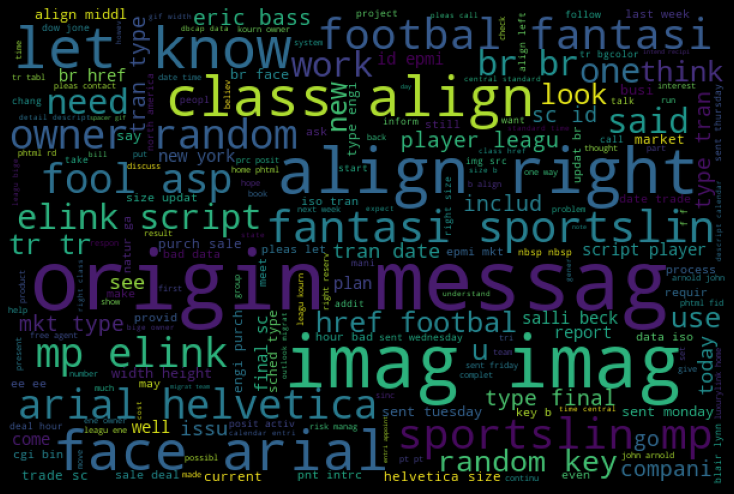

In [242]:
unique_wordcloud = WordCloud(width=600, height=400).generate(words_list)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(unique_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [243]:
# Abusive data after text processing

In [244]:
abusive = new_corp[new_corp["Class"]=="Abusive"]
abusive.head()

,index,Unnamed: 0,Class,content
0,0,0,Abusive,eat shit john j lavorato excelr pm john arnold...
1,1,1,Abusive,fuck
2,2,2,Abusive,gentlemen follow champagn avail approxim retai...
3,3,3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,4,4,Abusive,asshol john j lavorato excelr john arnold hou ...


In [245]:
# Abusive word cloud

In [246]:
abusive1 = ' '.join(abusive["content"])

In [247]:
abusive_words = abusive1.split()

In [248]:
ab_words  = [word for word in abusive_words if word not in add_stop_words]
ab_words = ' '.join(ab_words)

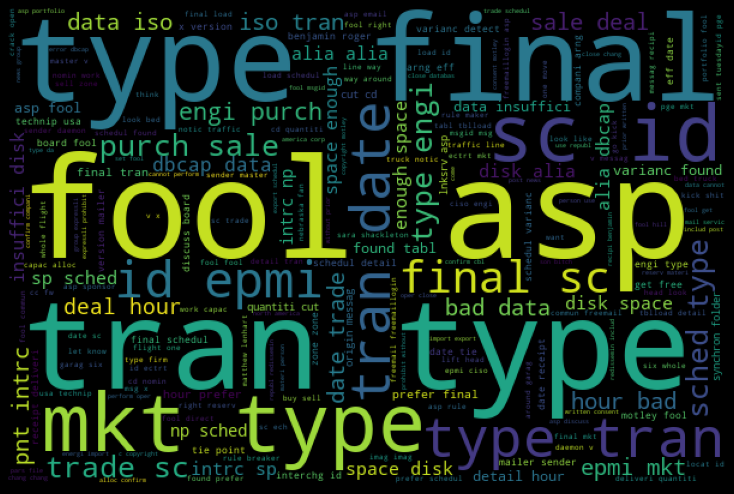

In [249]:
abusive_wordcloud = WordCloud(width=600, height=400, stopwords="english").generate(ab_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(abusive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [250]:
# Non-abusive data after text processing

In [251]:
non_abusive = new_corp[new_corp["Class"]=="Non Abusive"]
non_abusive.head()

,index,Unnamed: 0,Class,content
3410,3410,3410,Non Abusive,forecast
3411,3411,3411,Non Abusive,travel busi meet take fun trip especi prepar p...
3412,3412,3412,Non Abusive,test success way go
3413,3413,3413,Non Abusive,randi send schedul salari level everyon schedu...
3414,3414,3414,Non Abusive,let shoot tuesday


In [252]:
# Non-abusive word cloud

In [253]:
non_abusive2 = ' '.join(non_abusive["content"])

In [254]:
non_abusive_words = non_abusive2.split()

In [255]:
non_ab_words  = [word for word in non_abusive_words if word not in add_stop_words]
non_ab_words = ' '.join(non_ab_words)

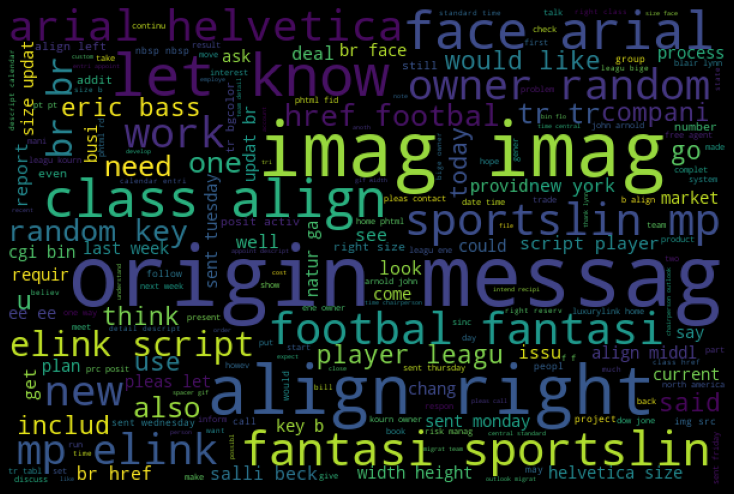

In [256]:
non_abusive_wordcloud = WordCloud(width=600, height=400, stopwords='english').generate(non_ab_words)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(non_abusive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [257]:
# Cleaning the data for additional stop words

In [258]:
corpus_new = []

for i in range(0, new_corp.shape[0]):
    content = new_corp["content"][i]
    words = content.split()
    
    # removing the additional stop words
    words = [word for word in words if word not in add_stop_words]
    
    # Joining the words
    title = ' '.join(words)
    
    # Building a corpus of news title 
    corpus_new.append(title)

In [259]:
len(corpus_new)

26405

In [260]:
corpus_new[0:10]

['eat shit john j lavorato john arnold cc footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk commun john arnold cc yeah monkey monkey hey littl bastard fuck pictur compani think help score women say balanc sheet yeah monkey b',
 'asshol john j lavorato john arnold cc john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato john arnold cc ram wash raider balt bear lion eagl bengal pat vike',
 'know hr rep name jennif burn john arnold cc shit head',
 'sorri taken long tri fend chick life 

In [261]:
# Creating new data using cleaned data

In [262]:
corp1 = pd.DataFrame(corpus_new)

In [263]:
new_corp1 = pd.concat([new_corp["Class"], corp1], axis=1)

In [264]:
new_corp1.head()

,Class,0
0,Abusive,eat shit john j lavorato john arnold cc footba...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato john arnold cc john can...


In [265]:
new_corp1.rename(columns={0 : "content"}, inplace=True)

In [266]:
new_corp1.head()

,Class,content
0,Abusive,eat shit john j lavorato john arnold cc footba...
1,Abusive,fuck
2,Abusive,gentlemen follow champagn avail approxim retai...
3,Abusive,sorri taken long tri fend chick life sooooo ha...
4,Abusive,asshol john j lavorato john arnold cc john can...


In [268]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [267]:
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [ ]:
# Adding 'length', 'words_count' and 'polarity' columns to dataset

In [ ]:
new_corp1['length'] = new_corp1["content"].apply(lambda x: len(x))

In [ ]:
new_corp1['word_count'] = new_corp1['content'].apply(lambda x: len(x.split()))

In [ ]:
new_corp1['polarity'] = new_corp1['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
new_corp1.head()

In [ ]:
# Seperating the "Abusive" and "Non Abusive" classes

In [ ]:
abusive = new_corp1[new_corp1["Class"]=="Abusive"]
abusive.head()

In [ ]:
abusive.shape

In [ ]:
non_abusive = new_corp1[new_corp1["Class"]=="Non Abusive"]
non_abusive.head()

In [ ]:
non_abusive.shape

In [ ]:
# Length distribution plot

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(abusive["length"], hist=True, label="abusive")
sns.distplot(non_abusive["length"], hist=True, label="non_abusive");

In [ ]:
sns.catplot(x="Class", y="length",data=new_corp1, kind= "box")

In [ ]:
abusive.length.mean()

In [ ]:
non_abusive.length.mean()

#### It can be observed that the mean length of non_abusive emails is higher than mean length of abusive emails

In [ ]:
# Word_count distribution plot

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(abusive.word_count, hist=True, label="abusive")
sns.distplot(non_abusive.word_count, hist=True, label="non_abusive");

In [ ]:
sns.catplot(x="Class", y="word_count",data=new_corp1, kind= "box")

In [ ]:
abusive['word_count'].mean()

In [ ]:
non_abusive['word_count'].mean()

#### It can be observed that the mean word_count of non_abusive emails is slightly higher than mean word_count of abusive emails

In [ ]:
# Polarity distribution plot

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(abusive.polarity, hist=True, label="abusive")
sns.distplot(non_abusive.polarity, hist=True, label="non_abusive");

In [ ]:
sns.catplot(x="Class", y="polarity",data=new_corp1, kind= "box")

In [ ]:
abusive['polarity'].mean()

In [ ]:
non_abusive['polarity'].mean()

#### It can be observed that the mean polarity of non_abusive emails is almost similar to the mean polarity of abusive emails. Hence both the mean of absive and non_abusive emails shows 'neutral' polarity 

### Distribution of Unigram, Bigram and Trigram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(new_corp1['content'], 20)

In [ ]:
words

### Unigram

In [ ]:
df_unigram = pd.DataFrame(words, columns= ['Unigram', 'Frequency'])

In [ ]:
df_unigram

In [ ]:
plt.figure(figsize=(15,5))
g= sns.barplot("Unigram",'Frequency', data=df_unigram, color="b")
g.set_xticklabels(df_unigram["Unigram"], rotation=30)
plt.show()

### Bigram

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(new_corp1['content'], 20)
words

In [ ]:
df_bigram = pd.DataFrame(words, columns= ['Bigram', 'Frequency'])
df_bigram

In [ ]:
plt.figure(figsize=(18,5))
g= sns.barplot("Bigram",'Frequency', data=df_bigram, color="b")
g.set_xticklabels(df_bigram["Bigram"], rotation=30)
plt.show()

### Trigram

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [ ]:
words = get_top_n_words(new_corp1['content'], 20)

In [ ]:
words

In [ ]:
df_trigram = pd.DataFrame(words, columns= ['Trigram', 'Frequency'])

In [ ]:
df_trigram

In [ ]:
plt.figure(figsize=(18,5))
g= sns.barplot("Trigram",'Frequency', data=df_trigram, color="b")
g.set_xticklabels(df_trigram["Trigram"], rotation=30)
plt.show()

In [ ]:
corpus = new_corp1['content'].tolist()

In [ ]:
corpus[0:10]

## Building of Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=5000)

In [ ]:
cv.get_params()

In [ ]:
# Indepedent variables

In [ ]:
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
X[0:10]

In [ ]:
# Dependent variable

In [ ]:
class_values = pd.get_dummies(new_corp1['Class'])
class_values = class_values.drop(columns="Non Abusive")
class_values = class_values.rename(columns={"Abusive":"Class"})

In [ ]:
y = class_values.values.ravel()

In [ ]:
# Splitting the train test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,'\n',
     X_test.shape)

In [ ]:
# Bag of words

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [ ]:
count_df.head()

## Model Building

### Building Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_classifier = MultinomialNB()

In [117]:
from sklearn.svm import SVC

In [118]:
nb_classifier = SVC(kernel="linear")

In [158]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [159]:
# Predicting the values

In [160]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [161]:
# Confusion matrix

In [162]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [163]:
confusion_matrix(y_train, y_pred_train)

array([[17917,   458],
       [  614,  2135]], dtype=int64)

In [164]:
confusion_matrix(y_test, y_pred_test)

array([[4490,  130],
       [ 147,  514]], dtype=int64)

In [165]:
# Checking accuracy, precision and recall

In [166]:
# For training

In [167]:
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

In [168]:
print("Accuracy for train: ", accuracy)
print("Precision for train: ", precision)
print("Recall for train: ", recall)

Accuracy for train:  0.9492520355993183
Precision for train:  0.823370613189356
Recall for train:  0.776646053110222


In [169]:
# For testing

In [170]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [171]:
print("Accuracy for test: ", accuracy)
print("Precision for test: ", precision)
print("Recall for test: ", recall)

Accuracy for test:  0.9475478129142207
Precision for test:  0.7981366459627329
Recall for test:  0.7776096822995462


### Hyperparameter tuning of Naive Bayes model

In [172]:
# Tuning the parameter 'alpha' to improve the accuracy

In [173]:
classifier=MultinomialNB(alpha=0.1)

In [174]:
previous_score=0
for alpha in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(round(alpha,1),score))

Alpha: 0.1, Score : 0.9483052452187086
Alpha: 0.2, Score : 0.9486839613709525
Alpha: 0.3, Score : 0.9486839613709525
Alpha: 0.4, Score : 0.9484946032948305
Alpha: 0.5, Score : 0.9483052452187086
Alpha: 0.6, Score : 0.9481158871425867
Alpha: 0.7, Score : 0.9481158871425867
Alpha: 0.8, Score : 0.9479265290664647
Alpha: 0.9, Score : 0.9475478129142207
Alpha: 1.0, Score : 0.9475478129142207


#### Highest accuracy is obtanined for the value alpha =0.3

### Logistic regression model

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
lr_classifier = LogisticRegression(max_iter=500, random_state=0)

In [119]:
lr_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [178]:
# Predicting the values

In [179]:
y_pred_train = lr_classifier.predict(X_train)

In [180]:
y_pred_test = lr_classifier.predict(X_test)

In [181]:
# Confusion matrix

In [182]:
confusion_matrix(y_train, y_pred_train)

array([[18375,     0],
       [   44,  2705]], dtype=int64)

In [183]:
confusion_matrix(y_test, y_pred_test)

array([[4595,   25],
       [  46,  615]], dtype=int64)

In [184]:
# Accuracy score, precision and recall

In [185]:
# For training

In [186]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [187]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.9979170611626585
Precision for train:  1.0
Recall for train:  0.9839941797017097


In [188]:
# For testing

In [189]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [190]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9865555765953418
Precision for test:  0.9609375
Recall for test:  0.9304084720121029


### Hyperparameter tuning for logistic regression

In [191]:
classifier=LogisticRegression(C=1)

In [192]:
previous_score=0
for i in np.arange(0.1,1.1,0.1):
    sub_classifier=LogisticRegression(max_iter=500, C=i, random_state=0)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("C: {}, Score : {}".format(round(i,1),score))

C: 0.1, Score : 0.9774663889414884
C: 0.2, Score : 0.982200340844537
C: 0.3, Score : 0.9846619958341223
C: 0.4, Score : 0.9844726377580004
C: 0.5, Score : 0.9850407119863662
C: 0.6, Score : 0.985608786214732
C: 0.7, Score : 0.9861768604430979
C: 0.8, Score : 0.9863662185192198
C: 0.9, Score : 0.9863662185192198
C: 1.0, Score : 0.9865555765953418


#### Highest accuracy is obtained for the value of C=1

## TFIDF Vectorizer

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [194]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,1))

In [197]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [276]:
tfidf_v.get_feature_names()[:10]

['aa',
 'aaron',
 'ab',
 'abandon',
 'abc',
 'abel',
 'abil',
 'abl',
 'abramo',
 'absenc']

In [198]:
# Independent variables

In [199]:
X = tfidf_v.fit_transform(corpus).toarray()

In [200]:
X.shape

(26405, 5000)

In [201]:
# Dependent variable

In [202]:
class_values = pd.get_dummies(new_corp1['Class'])
class_values = class_values.drop(columns="Non Abusive")
class_values = class_values.rename(columns={"Abusive":"Class"})

In [203]:
y = class_values.values.ravel()

In [204]:
# Splitting the train test data

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [206]:
# TFIDF vecotorized words

In [207]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aa,aaron,ab,abandon,abc,abel,abil,abl,abramo,absenc,...,zadow,zd,zdnet,zdnetonebox,zero,zima,zip,zipper,zone,zufferli
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.045022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.052454,0.0,0.0,0.0,0.0,0.0
2,0.0,0.124515,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.175902,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### Building Naive Bayes model

In [208]:
from sklearn.naive_bayes import MultinomialNB

In [209]:
nb_classifier = MultinomialNB()

In [210]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [211]:
# Predicting the values

In [212]:
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

In [213]:
# Confusion matrix

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [215]:
confusion_matrix(y_train, y_pred_train)

array([[18132,   243],
       [  712,  2037]], dtype=int64)

In [216]:
confusion_matrix(y_test, y_pred_test)

array([[4546,   74],
       [ 185,  476]], dtype=int64)

In [217]:
# Checking accuracy, precision and recall

In [218]:
# For training

In [219]:
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)

In [220]:
print("Accuracy for train: ", accuracy)
print("Precision for train: ", precision)
print("Recall for train: ", recall)

Accuracy for train:  0.9547907593258852
Precision for train:  0.8934210526315789
Recall for train:  0.7409967260822117


In [221]:
# For testing

In [222]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [223]:
print("Accuracy for test: ", accuracy)
print("Precision for test: ", precision)
print("Recall for test: ", recall)

Accuracy for test:  0.9509562582844159
Precision for test:  0.8654545454545455
Recall for test:  0.7201210287443268


### Hyperparameter tuning of Naive Bayes model

In [224]:
# Tuning the parameter 'alpha' to improve the accuracy

In [225]:
classifier=MultinomialNB(alpha=0.1)

In [226]:
previous_score=0
for alpha in np.arange(0.1,1.1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(round(alpha,1),score))

Alpha: 0.1, Score : 0.9549327778829767
Alpha: 0.2, Score : 0.953796629426245
Alpha: 0.3, Score : 0.9545540617307328
Alpha: 0.4, Score : 0.9545540617307328
Alpha: 0.5, Score : 0.9541753455784889
Alpha: 0.6, Score : 0.953985987502367
Alpha: 0.7, Score : 0.953796629426245
Alpha: 0.8, Score : 0.9520924067411475
Alpha: 0.9, Score : 0.9509562582844159
Alpha: 1.0, Score : 0.9509562582844159


#### Highest accuracy is obtanined for the value alpha =0.1

### Logistic regression model

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
lr_classifier = LogisticRegression(max_iter=500, random_state=0)

In [229]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [230]:
# Predicting the values

In [231]:
y_pred_train = lr_classifier.predict(X_train)

In [232]:
y_pred_test = lr_classifier.predict(X_test)

In [233]:
# Confusion matrix

In [234]:
confusion_matrix(y_train, y_pred_train)

array([[18333,    42],
       [  410,  2339]], dtype=int64)

In [235]:
confusion_matrix(y_test, y_pred_test)

array([[4605,   15],
       [ 103,  558]], dtype=int64)

In [236]:
# Accuracy score, precision and recall

In [237]:
# For training

In [238]:
Accuracy = accuracy_score(y_train, y_pred_train)
Precision = precision_score(y_train, y_pred_train)
Recall = recall_score(y_train, y_pred_train)

In [239]:
print("Accuracy for train: ", Accuracy)
print("Precision for train: ", Precision)
print("Recall for train: ", Recall)

Accuracy for train:  0.97860253739822
Precision for train:  0.9823603527929441
Recall for train:  0.8508548563113859


In [240]:
# For testing

In [241]:
Accuracy = accuracy_score(y_test, y_pred_test)
Precision = precision_score(y_test, y_pred_test)
Recall = recall_score(y_test, y_pred_test)

In [242]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9776557470176103
Precision for test:  0.9738219895287958
Recall for test:  0.8441754916792739


### Hyperparameter tuning for logistic regression

In [243]:
classifier=LogisticRegression(C=1)

In [244]:
previous_score=0
for i in np.arange(0.1,1.1,0.1):
    sub_classifier=LogisticRegression(max_iter=500, C=i, random_state=0)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("C: {}, Score : {}".format(round(i,1),score))

C: 0.1, Score : 0.9166824465063435
C: 0.2, Score : 0.9401628479454649
C: 0.3, Score : 0.9549327778829767
C: 0.4, Score : 0.9623177428517327
C: 0.5, Score : 0.9676197689831472
C: 0.6, Score : 0.9710282143533422
C: 0.7, Score : 0.9740579435712933
C: 0.8, Score : 0.9755728081802689
C: 0.9, Score : 0.9774663889414884
C: 1.0, Score : 0.9776557470176103


#### Highest accuracy is obtained for the value of C=1

### RNN model with LSTM

In [245]:
import tensorflow as tf

In [246]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [247]:
### Vocabulary size
voc_size=10000

In [248]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]

[[2081,
  4403,
  9358,
  5224,
  4014,
  9358,
  4458,
  6745,
  8557,
  9197,
  7088,
  680,
  1740,
  5303,
  9967,
  8163,
  5737,
  8378,
  7693,
  1902],
 [8422],
 [8570,
  7632,
  6438,
  7763,
  3246,
  6425,
  5846,
  2189,
  6138,
  5946,
  917,
  2748,
  6425,
  5846,
  6400,
  3747,
  3060,
  7613,
  2748,
  2059,
  6810,
  1052,
  6635,
  2748,
  7718,
  3400,
  1163,
  8596,
  2748,
  6425,
  5995,
  151,
  4412,
  4487,
  2788,
  6438,
  7549,
  31,
  6667,
  929,
  6164,
  7733,
  9961,
  5094,
  6405,
  8477,
  2756,
  6085,
  2140,
  4412,
  7115,
  2140,
  932,
  3391,
  6138],
 [773,
  7368,
  4372,
  6493,
  6614,
  3517,
  6279,
  9610,
  1387,
  5495,
  3925,
  5970,
  4795,
  1098,
  9358,
  4458,
  6745,
  8858,
  3925,
  3925,
  6855,
  7509,
  9054,
  8422,
  3742,
  725,
  2024,
  8180,
  9731,
  9417,
  1951,
  8569,
  5758,
  8858,
  3925,
  1748],
 [478,
  9358,
  5224,
  4014,
  9358,
  4458,
  6745,
  9358,
  4022,
  9132,
  9175,
  8872,
  6778,
  5055

### Embedding representation

In [249]:
sent_length = 200
embedding_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Building the LSTM model

In [250]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length =sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________
None


In [251]:
len(embedding_docs)

26405

In [252]:
X_final=np.array(embedding_docs)
y_final=np.array(y)

In [253]:
X_final.shape,y_final.shape

((26405, 200), (26405,))

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [255]:
# Training the model

In [256]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=20, batch_size= 100)

Epoch 1/20
185/185 [==============================] - 91s 461ms/step - loss: 0.3625 - accuracy: 0.8738 - val_loss: 0.1146 - val_accuracy: 0.9624
Epoch 2/20
185/185 [==============================] - 84s 454ms/step - loss: 0.0806 - accuracy: 0.9751 - val_loss: 0.0732 - val_accuracy: 0.9779
Epoch 3/20
185/185 [==============================] - 83s 451ms/step - loss: 0.0358 - accuracy: 0.9909 - val_loss: 0.0796 - val_accuracy: 0.9793
Epoch 4/20
185/185 [==============================] - 84s 453ms/step - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.0722 - val_accuracy: 0.9784
Epoch 5/20
185/185 [==============================] - 86s 464ms/step - loss: 0.0247 - accuracy: 0.9947 - val_loss: 0.0740 - val_accuracy: 0.9816
Epoch 6/20
185/185 [==============================] - 84s 456ms/step - loss: 0.0133 - accuracy: 0.9968 - val_loss: 0.0723 - val_accuracy: 0.9826
Epoch 7/20
185/185 [==============================] - 85s 457ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.0781 - val_ac

In [257]:
y_pred=model.predict_classes(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [258]:
confusion_matrix(y_test,y_pred)

array([[6844,   74],
       [  65,  939]], dtype=int64)

In [259]:
# Checking accuracy

In [260]:
Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred)
Recall = recall_score(y_test,y_pred)

In [261]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9824539257763191
Precision for test:  0.926949654491609
Recall for test:  0.9352589641434262


#### Highest accuracy achieved with LSTM is 98.24%

### Bidirectional LSTM

In [262]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length =sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               120800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 621,001
Trainable params: 621,001
Non-trainable params: 0
_________________________________________________________________
None


In [263]:
len(embedding_docs)

26405

In [264]:
X_final=np.array(embedding_docs)
y_final=np.array(y)

In [265]:
X_final.shape,y_final.shape

((26405, 200), (26405,))

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [267]:
# Training the model

In [268]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=20, batch_size= 100)

Epoch 1/20
185/185 [==============================] - 155s 815ms/step - loss: 0.3679 - accuracy: 0.8794 - val_loss: 0.1072 - val_accuracy: 0.9645
Epoch 2/20
185/185 [==============================] - 151s 816ms/step - loss: 0.0749 - accuracy: 0.9795 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 3/20
185/185 [==============================] - 153s 828ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.0650 - val_accuracy: 0.9813
Epoch 4/20
185/185 [==============================] - 154s 830ms/step - loss: 0.0291 - accuracy: 0.9922 - val_loss: 0.0702 - val_accuracy: 0.9799
Epoch 5/20
185/185 [==============================] - 151s 816ms/step - loss: 0.0160 - accuracy: 0.9958 - val_loss: 0.0767 - val_accuracy: 0.9798
Epoch 6/20
185/185 [==============================] - 153s 828ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0865 - val_accuracy: 0.9799
Epoch 7/20
185/185 [==============================] - 149s 807ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.0810 -

In [269]:
y_pred=model.predict_classes(X_test)

In [270]:
# Confusion matrix

In [271]:
confusion_matrix(y_test,y_pred)

array([[6812,  106],
       [  61,  943]], dtype=int64)

In [272]:
# Checking accuracy

In [273]:
Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred)
Recall = recall_score(y_test,y_pred)

In [274]:
print("Accuracy for test: ", Accuracy)
print("Precision for test: ", Precision)
print("Recall for test: ", Recall)

Accuracy for test:  0.9789194647816208
Precision for test:  0.8989513822688274
Recall for test:  0.9392430278884463


#### Highest accuracy achieved with Bidirectional LSTM is 97.89%

### Observations

#### Between bag of words and TFIDF, bag of words got the highest accuracy of 98.65% in logistic regression with C=1.
#### Between unidirectional and bidirectional LSTM, unidirectional LSTM got the highest accuracy of 98.24% with 100 neurons and 20 epochs.